<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;>
<b>
<span style='color:skyblue'>IEEE Machine Learning season 2025 </span>
</b>
<div>
<span style='color:Salmon'>Ensemble Learning</span>

</div>

</div>

<br>


<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;"> 
<b>
<span style='color:skyblue'>IEEE FCIH SB Machine Learning season 2025 </span>
</b>
<div>
<span style='color:Salmon'>Ensemble Learning</span>

</div>

</div>

<br>


<a id="key"></a>
# Table of Content
1) [importing libraries](#1)

2) [Reading the dataset](#2)
   - 2.1 [Heart dataset💖](#21)

3) [Preprocessing](#3)
   - 3.1 [Encoding](#3.1)
   - 3.2 [Why we don't need to scale the data in tree🌳_based models](#3.2)

4) [EDA](#eda)

5) [Preparing the data](#4)
   - 4.1 [Spliting the data into X features and y the target](#4.1)
   - 4.2 [Spliting the data into Train and Test](#4.2)

6) [Modeling](#6)
   - 6.1 [Max Voting](#6.1)

7) [Random Forest](#7)
   - [Bootstrapping](#7.1)
   - [How the Forest work?](#7.2)
   - [Grid search](#7.3)
   - [Out of Bag (OOB) score](#7.4)
   
8) [Ada Boost](#8)
   - [Ada Boost Parameters](#8.1)
   - [Grid Search](#8.2)

# <a id="1">importing libraries </a>
[🌟go to table of content🌟](#key)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from the ensemble model we import some classifiers
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
    AdaBoostClassifier,
    )
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# <a id="2">Reading the dataset </a>
[🌟go to table of content🌟](#key)

In [2]:
# reading the dataset
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# <a id="21">Heart dataset💖</a>
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. <span style= "color :red">HeartDisease: output class [1: heart disease, 0: Normal]</span>

[🌟go to table of content🌟](#key)

In [3]:
# dataset info
# no messing values
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# describing
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
# describing the categories
heart.describe(include='O')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


## <a id="3">Preprocessing</a>
[🌟go to table of content🌟](#key)

## <a id="31">Encoding</a>


In [6]:
# selecting columns that would be encoded
heart.select_dtypes(include="O")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [7]:
# selecting columns that would be encoded
cols = heart.select_dtypes(include="O").columns
cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [8]:
# Encoding
from sklearn.preprocessing import LabelEncoder

# initiating the encoder class
lenc = LabelEncoder()

# looping over each columns from the object type columns
for col in cols:
    # encode these columns
    heart[col] = lenc.fit_transform(heart[col])

# diplaying
heart.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1


# <a id="32">Why we don't need to scale the data in tree🌳_based models</a>?


<br>

<div style="border-radius:10px;border:salmon solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    Scaling is a common preprocessing step for many machine learning algorithms, particularly those that rely on <strong><mark style ="background-color:salmon;color:white;border-radius:4px;opacity:1.0">distance-based metrics</mark></strong> or <mark style="background-color:salmon;border-radius:4px;opacity:1.0;color:white"><strong>gradient-based optimization methods</strong></mark>. However, tree-based models work differently, and their inherent structure and algorithmic characteristics make scaling unnecessary
</div>


<br>

# <a id="eda">EDA</a>

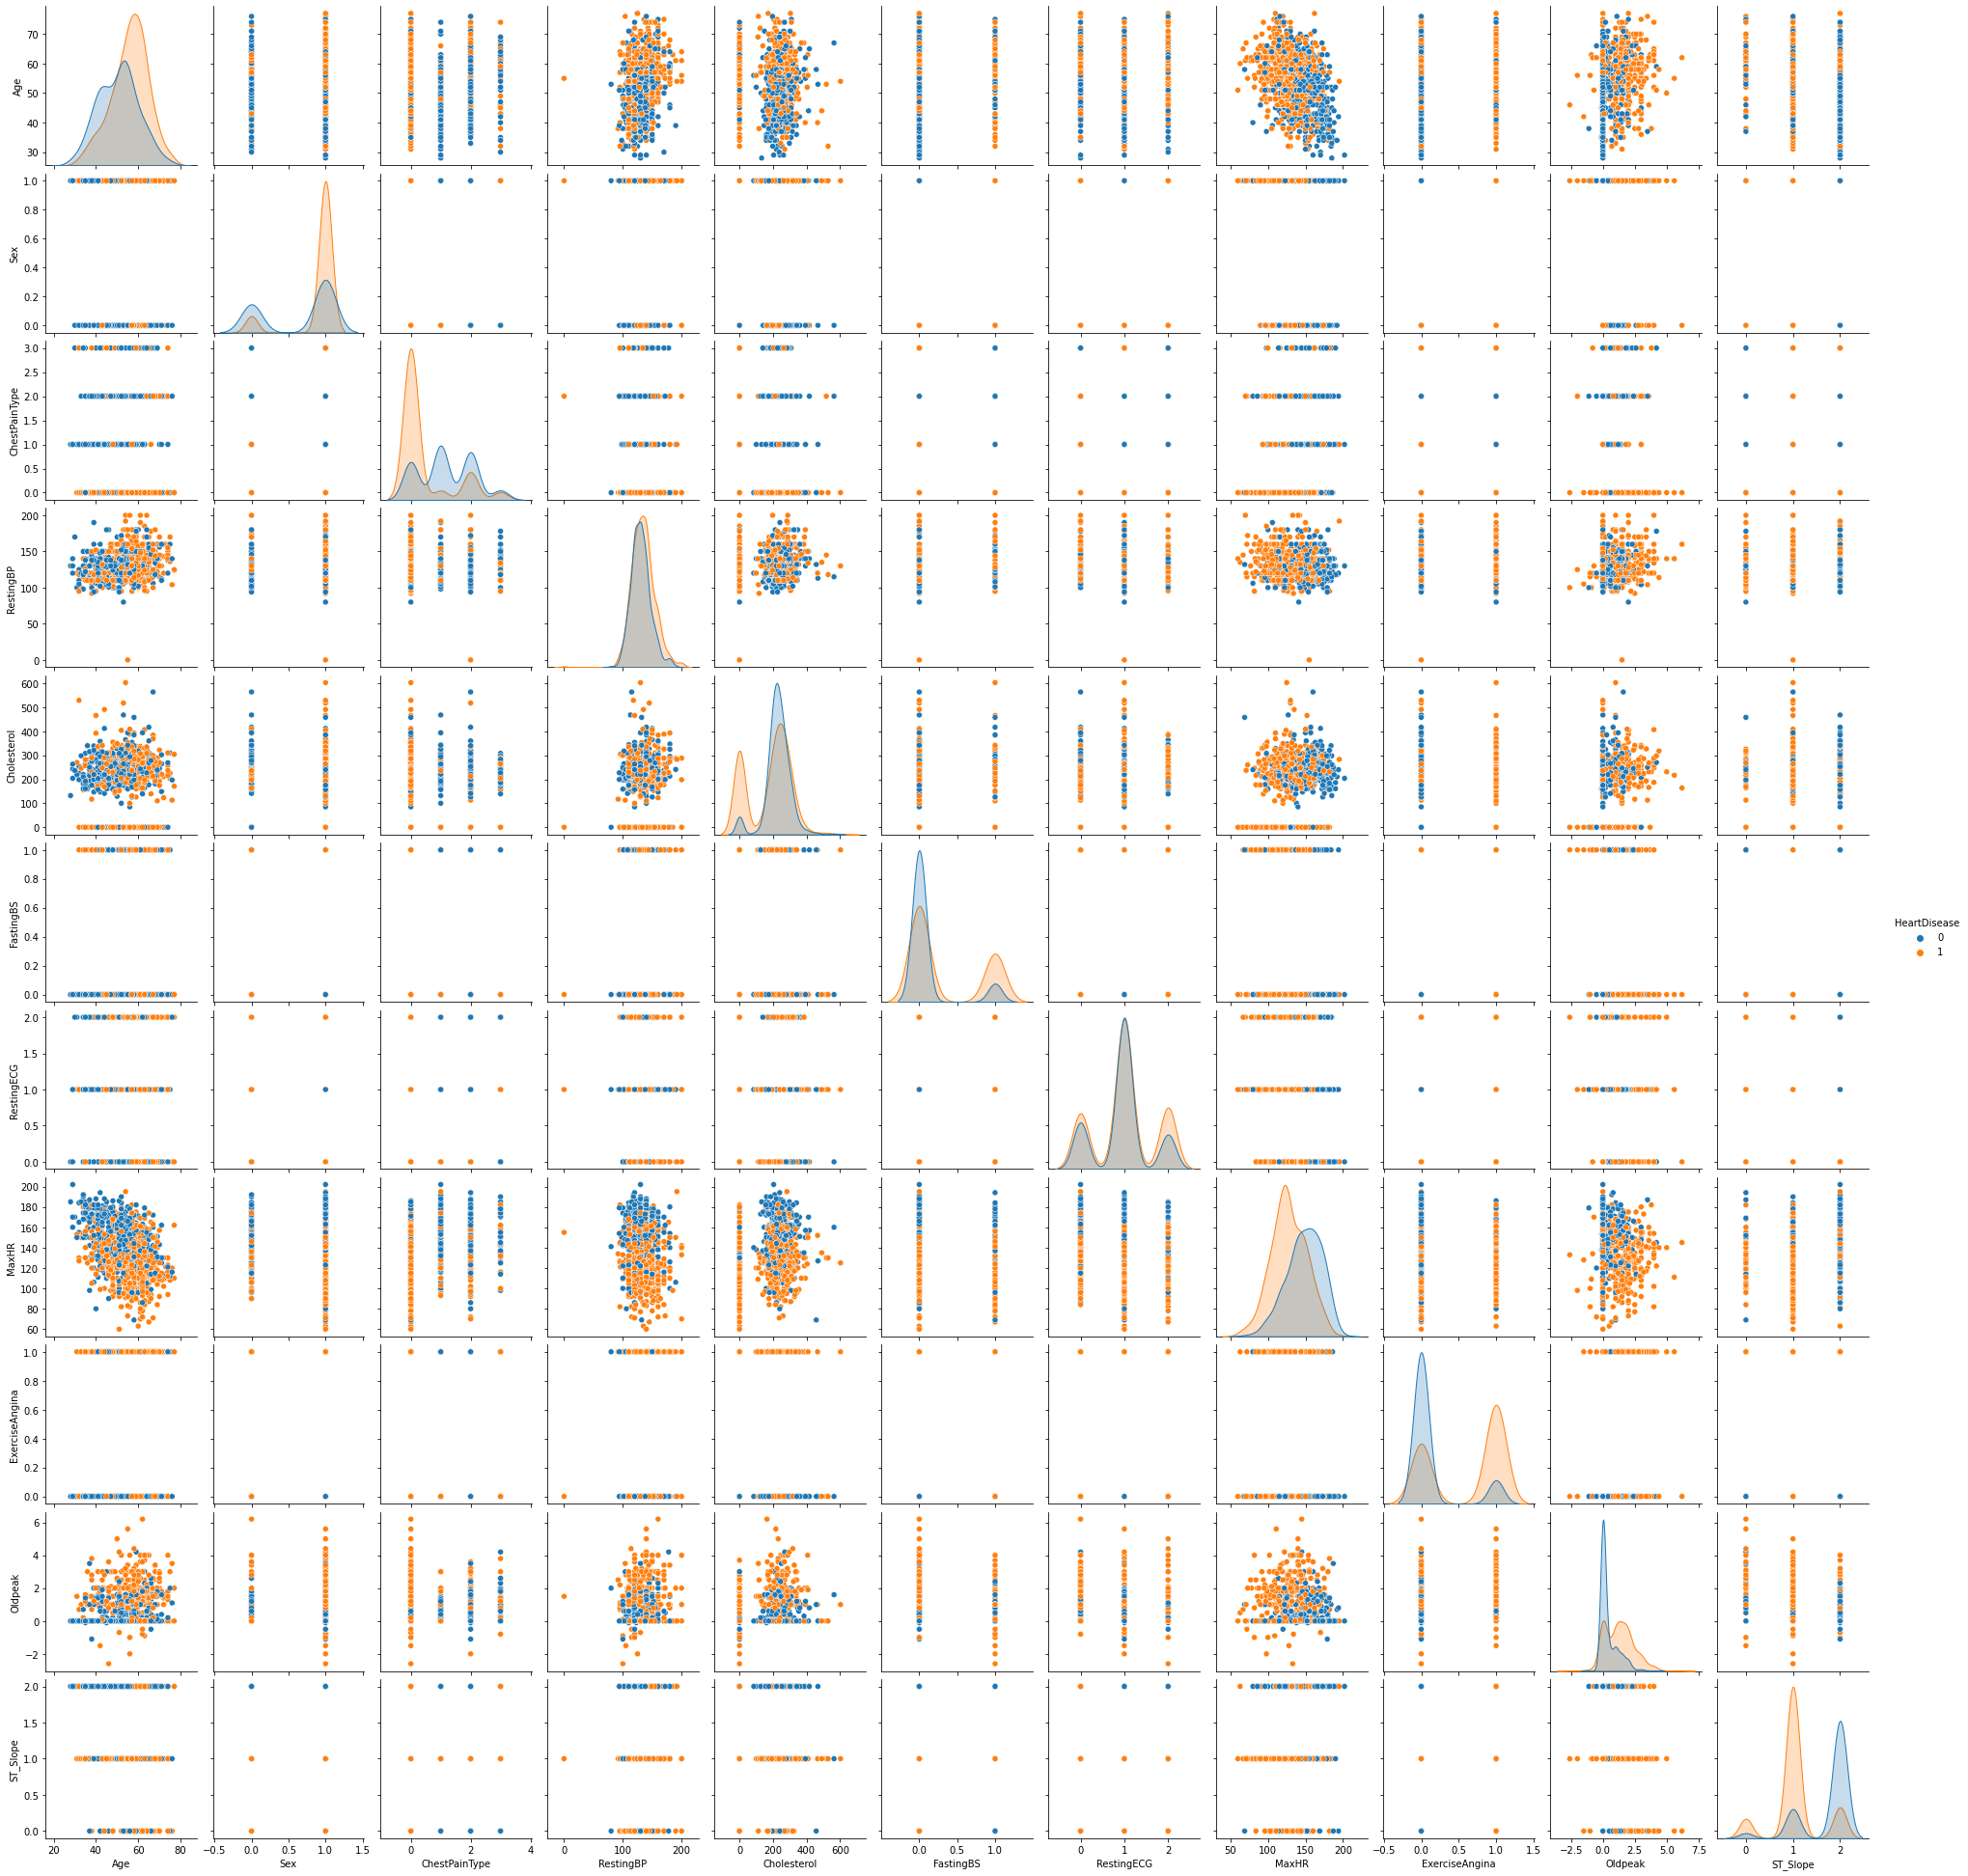

In [ ]:
import seaborn as sns
sns.pairplot(data=heart, hue="HeartDisease");

<AxesSubplot:>

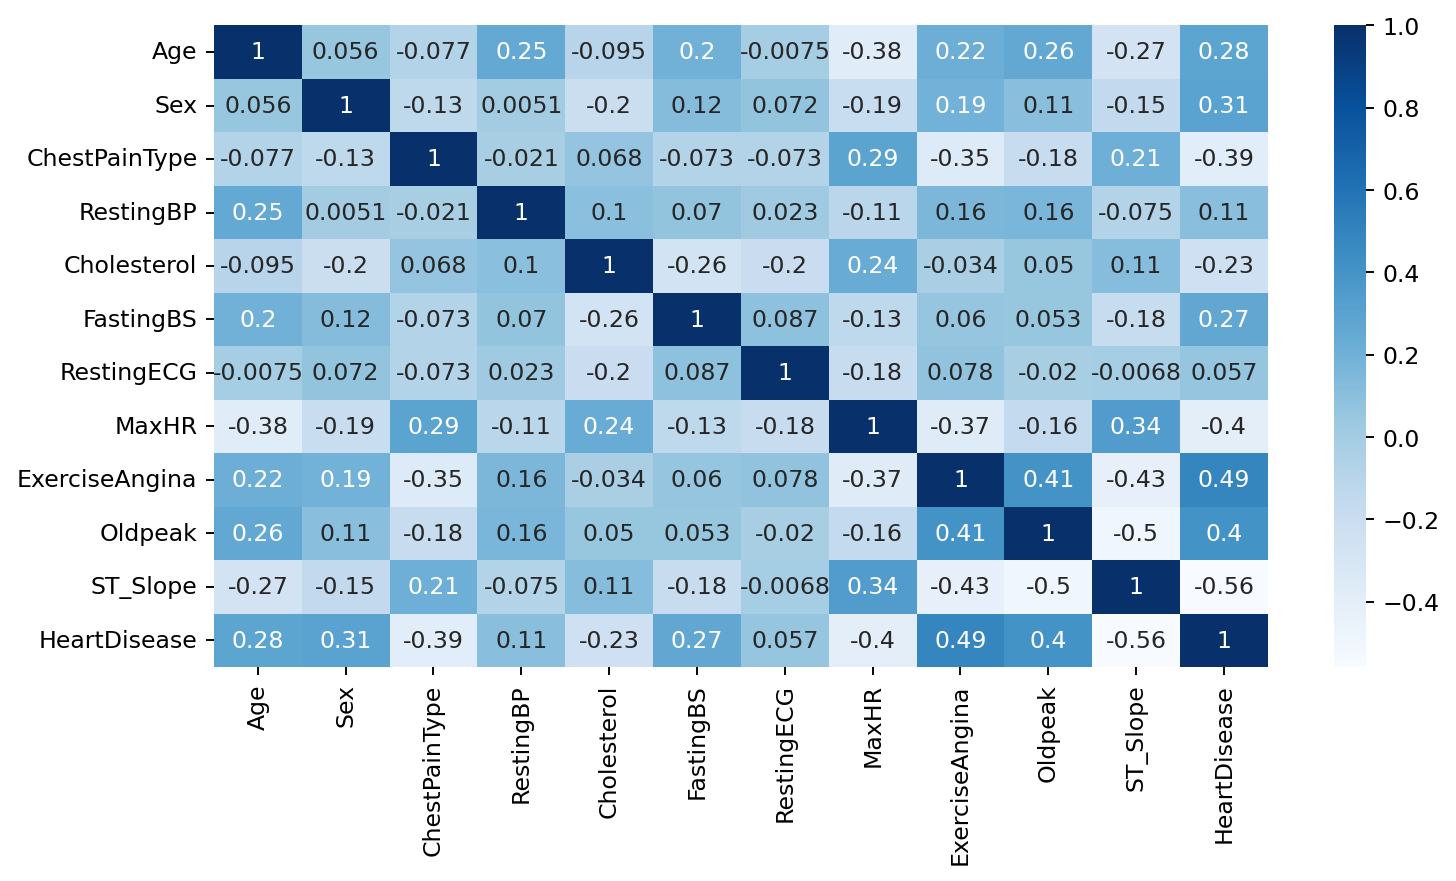

In [ ]:
fig = plt.figure(figsize=(10,5), dpi=170)
sns.heatmap(heart.corr(), cmap="Blues", annot=True)

# <a id="4">Preparing the data</a>

# <a id="41">Spliting the data into X features and y the target</a>

In [9]:
X = heart.drop(columns=["HeartDisease"])
y = heart["HeartDisease"]

# <a id="42">Spliting the data into Train and Test</a>

In [10]:
from sklearn.model_selection import train_test_split

# spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <a id="6">Modeling</a>

## <a id="61">Max Voting</a>

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
model1 = LogisticRegression(max_iter=1000)
# you may find a warning when using Logistic regression here that the solver didn't converge and reached Limit
# so I make max_iter=1000 that may be a side effect of not scalling the data for logistic regression
model1.fit(X_train, y_train)
print(f"Training score {model1.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(model1, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {model1.score(X_test, y_test)}")

Training score 0.8623978201634878
Cross Validation 0.8528562109775416
Testing score 0.842391304347826


In [15]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
print(f"Training score {model2.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(model2, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {model2.score(X_test, y_test)}")
# overfitting
# here you may notice how Cross validation is useful

Training score 1.0
Cross Validation 0.7861429503308173
Testing score 0.7989130434782609


In [16]:
# let's compine these models
combined = VotingClassifier(estimators=[('lr',model1), ('dt', model2)], voting='hard')
combined.fit(X_train, y_train)

print(f"Training score {combined.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(combined, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {combined.score(X_test, y_test)}")
# we could reduce the overfitting 7% and we can do more better if we used more models
# Cross Validation also show the real efficiency of the model over the training set that was almost like the real test data

Training score 0.9400544959128065
Cross Validation 0.7970552604603485
Testing score 0.7771739130434783


# <a id="7"> Random Forest 🌲🌲🌲</a>

## <a id="71">Bootstrapping</a>

<br>

<div style="border-radius:10px;border:lightgreen solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
   <strong>Random Sampling <mark style="color:white; background-color:lightgreen; border-radius:4px;opacity:1.0">with replacement</mark><strong>, allowing the observations to be chosen multiple times
</div>


<br>

![Bootstrapping](image.png)

## <a id="72">How the Forest work?</a>

![Forest](image-1.png)

In [17]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

# evaluating
print(f"Training score {model3.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(model3, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {model3.score(X_test, y_test)}")

Training score 1.0
Cross Validation 0.867831516168111
Testing score 0.9021739130434783


In [18]:
mo = RandomForestClassifier(ccp_alpha=0.01)
mo.fit(X_train, y_train)

# evaluating
print(f"Training score {mo.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(mo, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {mo.score(X_test, y_test)}")

Training score 0.8773841961852861
Cross Validation 0.8596216568819308
Testing score 0.875


In [19]:
mo1 = RandomForestClassifier(ccp_alpha=0.001)
mo1.fit(X_train, y_train)

# evaluating
print(f"Training score {mo1.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(mo1, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {mo1.score(X_test, y_test)}")

Training score 0.9959128065395095
Cross Validation 0.8732736930388594
Testing score 0.8913043478260869


In [20]:
mo2 = RandomForestClassifier(n_estimators=70)
mo2.fit(X_train, y_train)

# evaluating
print(f"Training score {mo2.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(mo2, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {mo2.score(X_test, y_test)}")

Training score 1.0
Cross Validation 0.8610287950796757
Testing score 0.8586956521739131


In [21]:
# how about max voting 🫣
voter = VotingClassifier(estimators=[('mo', mo), ('mo1', mo1), ('mo2', mo2)], n_jobs=-1, voting='hard')

voter.fit(X_train, y_train)
# evaluating
print(f"Training score {voter.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(voter, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {voter.score(X_test, y_test)}")

Training score 0.9931880108991825
Cross Validation 0.8664523343584009
Testing score 0.8967391304347826


# <a id="73">Grid Search</a>

In [23]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
# Specify the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': [None, 'sqrt', 'log2', 3, 0.5],  # Number of features to consider at each split
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create a grid search instance
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': [None, 'sqrt', 'log2', 3, 0.5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

<br>
<div style="border-radius:10px; border:1px solid skyblue; padding:15px; background-color:#ffffff00; font-size:100%; text-align:left; word-wrap:break-word; white-space:normal; max-width:100%;">
  <p><strong>Note:</strong> As of <code>scikit-learn 1.1</code>, <code>'auto'</code> has been <strong>deprecated</strong> and will be removed in version <code>1.3</code>. Use <code>'sqrt'</code> instead.</p>

  <p>The <strong><code>max_features</code></strong> hyperparameter in scikit-learn's Random Forest and Decision Tree models controls the number of features to consider when making a split at each node of a tree. It can take on several values, including:</p>

  <ol>
    <li><strong><code>'auto'</code></strong>: <em>(Deprecated)</em> Automatically sets <code>max_features</code> to the 
      <mark style="background-color:skyblue; color:white; border-radius:4px;">square root of the total number of features</mark>. 
      For example, if you have 16 features, <code>'auto'</code> would set <code>max_features</code> to 4.
    </li>
    <li><strong><code>'sqrt'</code></strong>: Identical to <code>'auto'</code>, sets <code>max_features</code> to the 
      <mark style="background-color:skyblue; color:white; border-radius:4px;">square root of the total number of features</mark>.
    </li>
    <li><strong><code>'log2'</code></strong>: Sets <code>max_features</code> to the 
      <mark style="background-color:skyblue; color:white; border-radius:4px;">base-2 logarithm of the total number of features</mark>.
    </li>
    <li><strong>Integer value</strong>: Specifies the 
      <mark style="background-color:skyblue; color:white; border-radius:4px;">exact number of features</mark> to consider at each split, e.g., <code>max_features=10</code>.
    </li>
    <li><strong>Float between 0 and 1</strong>: Uses a 
      <mark style="background-color:skyblue; color:white; border-radius:4px;">fraction of the total features</mark> at each split, e.g., <code>max_features=0.5</code>.
    </li>
  </ol>

  <p>The choice of <code>max_features</code> affects the model's performance. Smaller values can reduce overfitting and increase diversity among trees, while larger values can increase model complexity. Use <code>'sqrt'</code> or <code>'log2'</code> for balanced control, especially when tuning hyperparameters.</p>
</div>
</br>


In [24]:
# Get the best model and its hyperparameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the best model on your test data
test_accuracy = best_rf.score(X_test, y_test)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8746528748485695
Test Accuracy: 0.8967391304347826


In [25]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.576435,0.047010,0.025829,0.004715,None,1,2,100,"{'max_features': None, 'min_samples_leaf': 1, ...",0.836735,0.877551,0.836735,0.816327,0.835616,0.840593,0.020046,133
1,1.176820,0.107387,0.053003,0.008555,None,1,2,200,"{'max_features': None, 'min_samples_leaf': 1, ...",0.836735,0.884354,0.823129,0.816327,0.849315,0.841972,0.024043,129
2,1.707213,0.202431,0.068410,0.017581,None,1,2,300,"{'max_features': None, 'min_samples_leaf': 1, ...",0.836735,0.884354,0.823129,0.816327,0.842466,0.840602,0.023779,132
3,0.600869,0.085055,0.024906,0.003211,None,1,5,100,"{'max_features': None, 'min_samples_leaf': 1, ...",0.843537,0.877551,0.823129,0.823129,0.828767,0.839223,0.020567,135
4,1.302579,0.199528,0.056231,0.007639,None,1,5,200,"{'max_features': None, 'min_samples_leaf': 1, ...",0.843537,0.891156,0.829932,0.816327,0.842466,0.844684,0.025250,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.938138,0.076264,0.053583,0.005258,0.5,4,5,200,"{'max_features': 0.5, 'min_samples_leaf': 4, '...",0.877551,0.897959,0.857143,0.836735,0.849315,0.863741,0.021645,52
131,1.426711,0.177185,0.093933,0.012955,0.5,4,5,300,"{'max_features': 0.5, 'min_samples_leaf': 4, '...",0.877551,0.897959,0.850340,0.843537,0.849315,0.863741,0.020772,52
132,0.461213,0.059561,0.028719,0.002847,0.5,4,10,100,"{'max_features': 0.5, 'min_samples_leaf': 4, '...",0.877551,0.897959,0.850340,0.829932,0.849315,0.861019,0.023897,80
133,0.961076,0.083878,0.054320,0.010077,0.5,4,10,200,"{'max_features': 0.5, 'min_samples_leaf': 4, '...",0.870748,0.897959,0.850340,0.829932,0.849315,0.859659,0.023097,98


In [26]:
grid_search.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

## <a id="74">Out Of Bag score (OOB)</a>

In [27]:
model4 = RandomForestClassifier(random_state=42, min_samples_leaf=2, min_samples_split=10, n_estimators=100, oob_score=True)
# Fit the model to the data
model4.fit(X_train, y_train)

# Access the OOB score (accuracy)
oob_score = model4.oob_score_
print("OOB Score:", oob_score)
# note if you didn't state oob_score=True
# and tried to do oob score an error would rise as the model has no attribute called oob_score (false default)

OOB Score: 0.8610354223433242


# <a id= "8">Ada Boost</a>

In [28]:
boost_model = AdaBoostClassifier(random_state=42)

# fitting the model
boost_model.fit(X_train, y_train)

# Evaluating
print(f"Training score {boost_model.score(X_train, y_train)}")
print(f"Cross Validation {cross_val_score(boost_model, X_train, y_train, cv=5, n_jobs=-1).mean()}")
print(f"Testing score {boost_model.score(X_test, y_test)}")

Training score 0.8773841961852861
Cross Validation 0.8501723977262138
Testing score 0.8532608695652174


### <a id="81">Ada Boost Parameters</a>

1. **`n_estimators`**:
    - This hyperparameter determines the number of weak learners (base estimators) to train. Increasing **`n_estimators`** can lead to a more powerful ensemble, but it may also increase the risk of overfitting. You can perform cross-validation or use other methods to find an appropriate value for this parameter.
2. **`estimator`**:
    - AdaBoost can use different base estimators (e.g., DecisionTreeClassifier, RandomForestClassifier, etc.). The choice of the base estimator should depend on the characteristics of your data. For example, if your data is non-linear, using a decision tree with deep branching might be suitable.
3. **`learning_rate`**:
    - The learning rate shrinks the contribution of each weak learner in the ensemble. A smaller learning rate (e.g., 0.1 or lower) may improve generalization but require more estimators. A larger learning rate (e.g., 1.0) makes the ensemble learn faster but can lead to overfitting.
4. **`algorithm`**:
    - AdaBoost has two algorithms: 'SAMME' (default) and 'SAMME.R'. 'SAMME.R' can handle continuous and multiclass targets and typically performs better. However, it requires that the base estimator has **`predict_proba`** method to compute class probabilities.
5. **`random_state`**:
    - Set a random seed (**`random_state`**) for reproducibility if needed.
6. **Base Estimator Parameters**:
    - If you use a decision tree as the base estimator, you can also tune its hyperparameters, such as **`max_depth`**, **`min_samples_split`**, and **`min_samples_leaf`**, to control the complexity of the individual trees.
7. **Feature Scaling and Preprocessing**:
    - Depending on the choice of base estimator, you might need to consider feature scaling and preprocessing steps that are suitable for that estimator.

## <a id="82"> Grid search </a>

In [30]:
# Create an AdaBoostClassifier instance
ada_boost = AdaBoostClassifier(random_state=42)

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth=1), LogisticRegression()],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=1),
                                       LogisticRegression()],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [31]:
best_model = grid_search.best_estimator_
best_model

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=100, random_state=42)

In [32]:
best_model.score(X_test, y_test)

0.8641304347826086

In [33]:
best_model.score(X_train, y_train)

0.8678474114441417

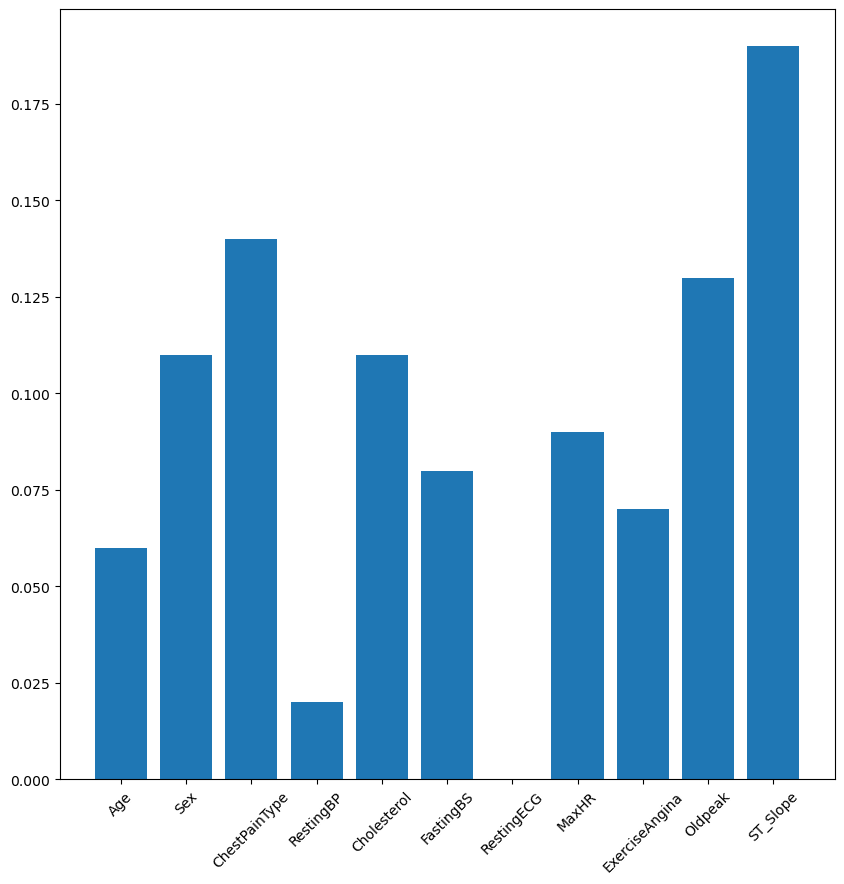

In [34]:
importance = best_model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10,10))
plt.bar(features, importance)
plt.xticks(rotation = 45);

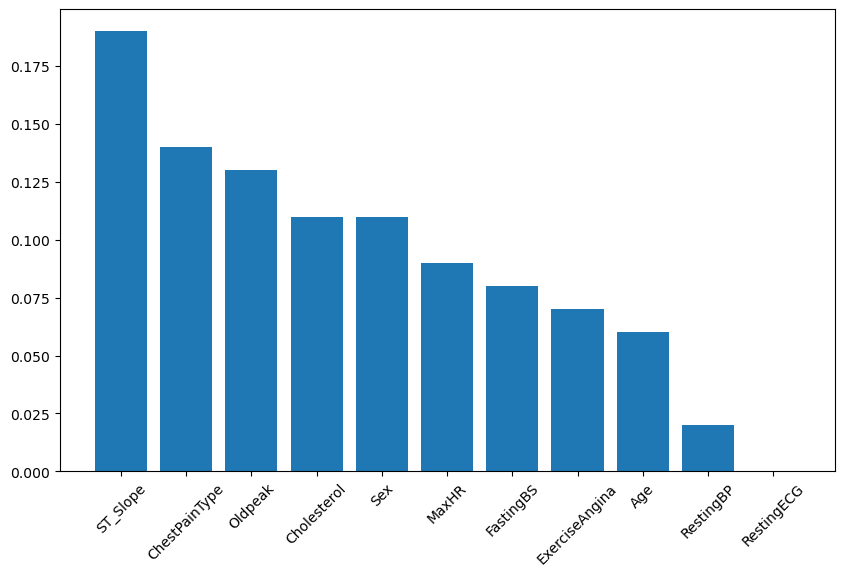

In [47]:
# Sort features by importance in descending order
sorted_indices = np.argsort(importance)[::-1]  # Sort and reverse to get most important first
sorted_importance = importance[sorted_indices]
sorted_features = features[sorted_indices]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance)
plt.xticks(rotation = 45);
plt.show()

In [63]:
heart.corr().loc[:, 'HeartDisease'].abs().sort_values(ascending=False).reset_index()

,index,HeartDisease
0,HeartDisease,1.000000
1,ST_Slope,0.558771
2,ExerciseAngina,0.494282
3,Oldpeak,0.403951
4,MaxHR,0.400421
5,ChestPainType,0.386828
6,Sex,0.305445
7,Age,0.282039
8,FastingBS,0.267291
9,Cholesterol,0.232741


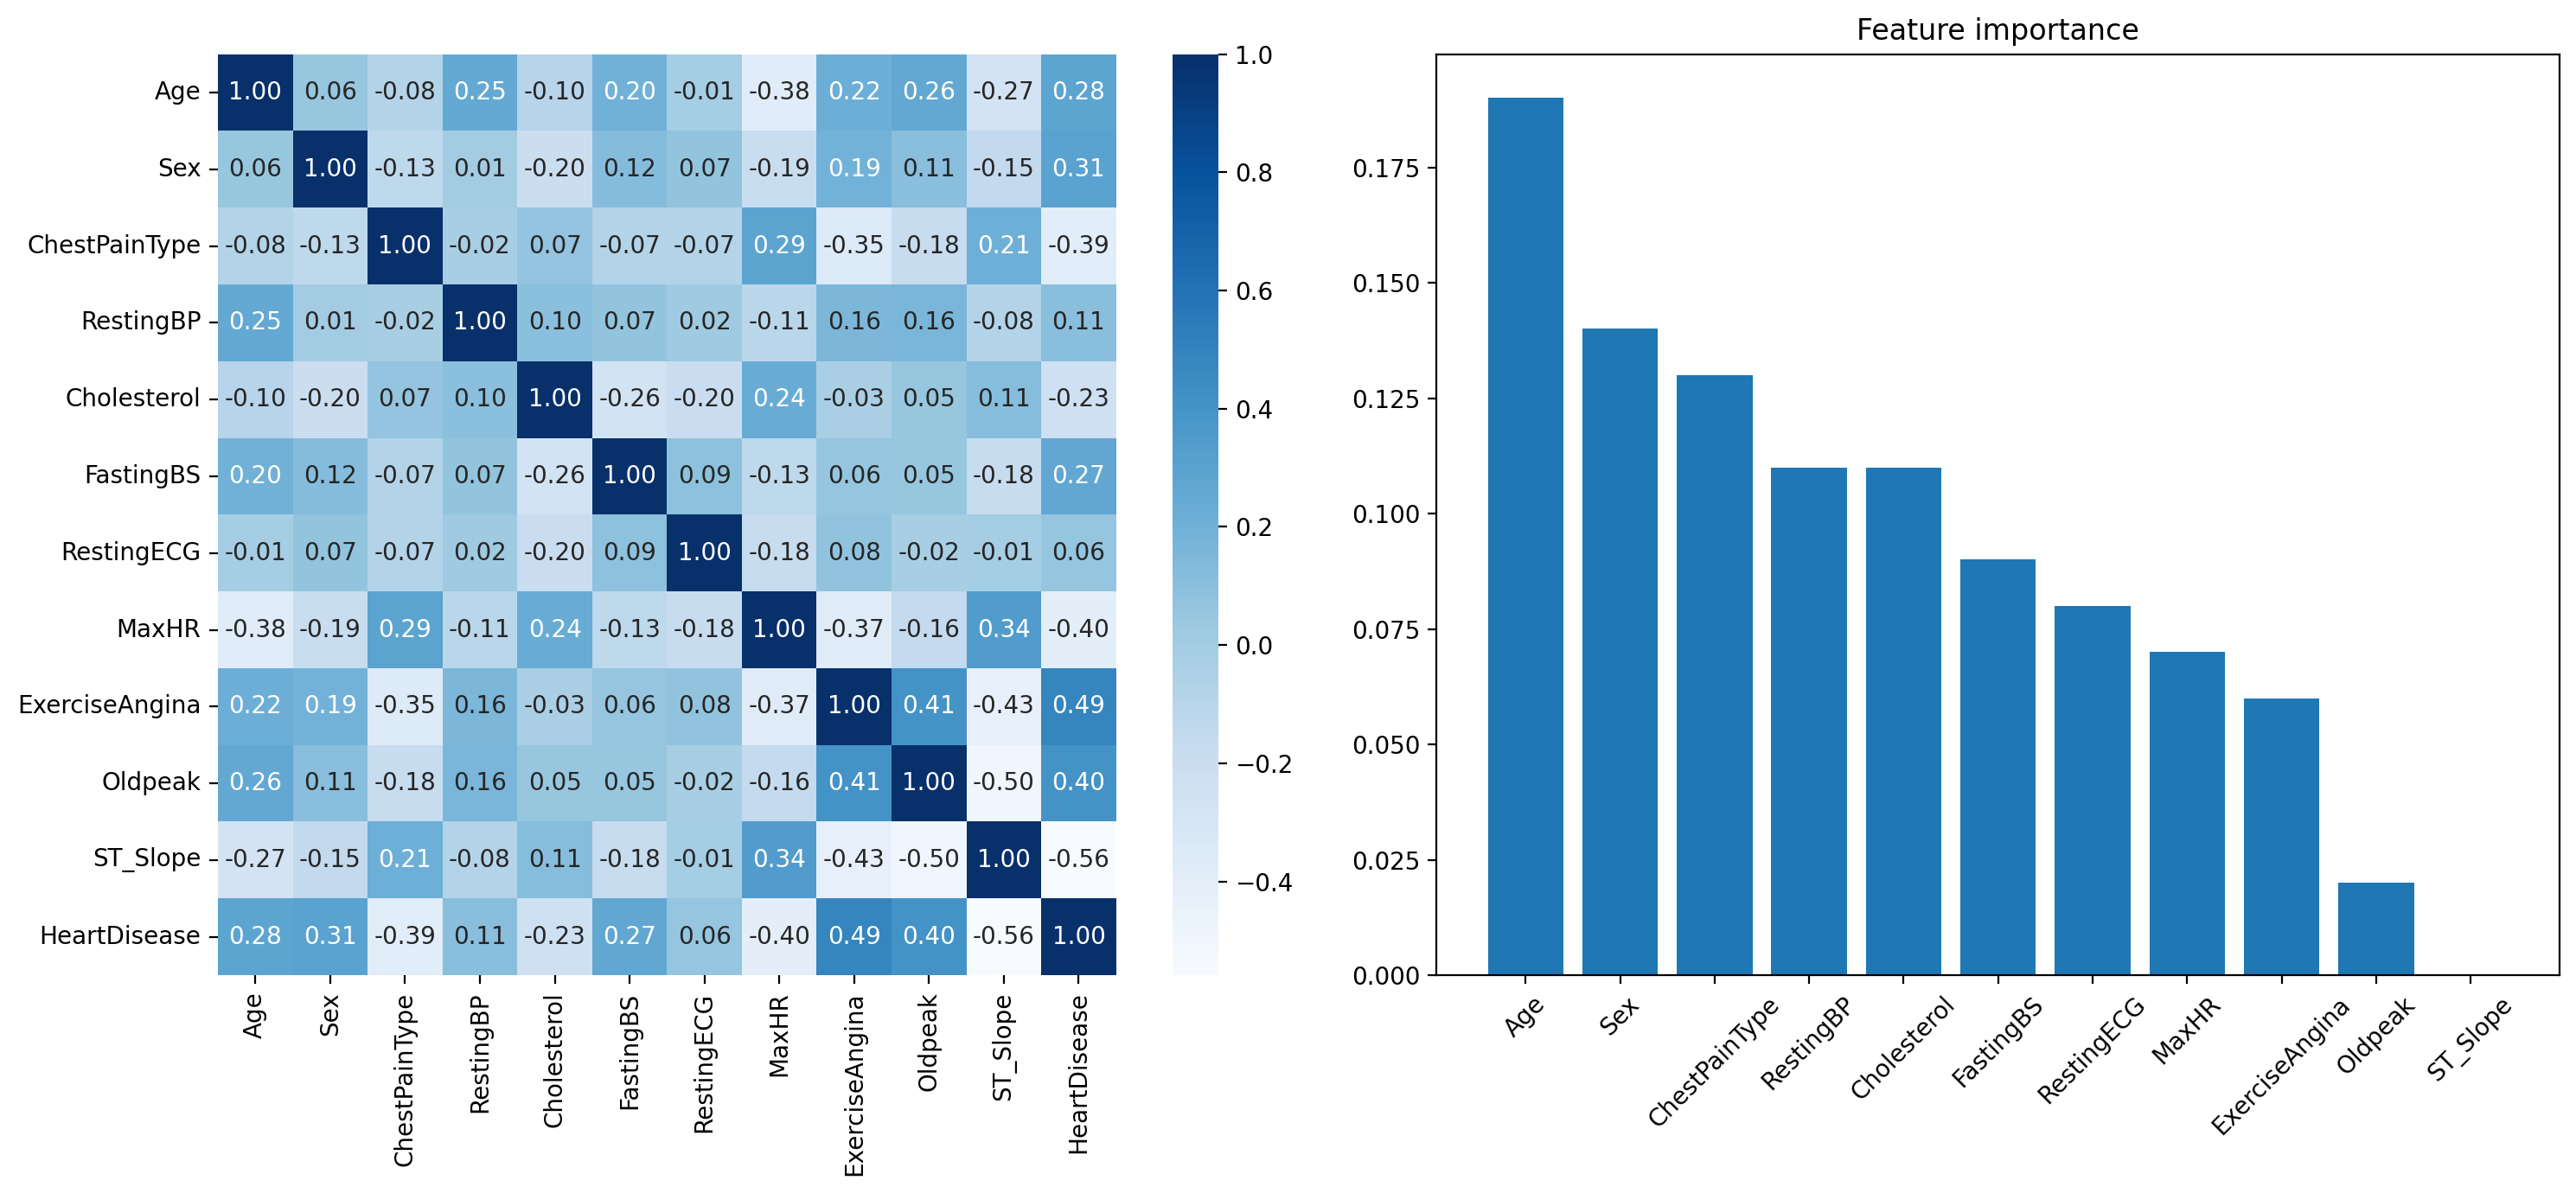

In [ ]:
import seaborn as sns
ax = [None for i in range(2)]

plt.figure(figsize=(15,7), dpi=200)

# making the structure
ax[0] = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax[1] = plt.subplot2grid((1, 2), (0, 1), colspan=1)

# seaborn correlation heatmap at ax[0]
# heart.corr()['HeartDisease'].abs().values.reshape(1, -1)
sns.heatmap(data=heart.corr(), annot=True, cmap="Blues", ax=ax[0], fmt=".2f")

# feature importance at ax[1]
ax[1].bar(sorted_features, sorted_importance)
ax[1].set_xticks(range(len(features)))
ax[1].set_xticklabels(features, rotation=45)  # Use set_xticklabels to rotate x-axis labels
ax[1].set_title("Feature importance")  # Use set_title to set the title

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

[🌟go to table of content🌟](#key)